# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender=pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier=pd.get_dummies(df["City Tier"], prefix="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head() 

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()


,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
               "Record"] ##Columnas que actuarán de variables predictoras

In [11]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137544
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Female', -131.02501325554584),
 ('Gender_Male', 131.02501325554567),
 ('City_Tier 1', 76.76432601049501),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.233445744565)]

In [15]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
* Total_Spend = -79.41713030137544 + 'Monthly Income' 0.14753898049205746 + 'Transaction Time' 0.15494612549589704 + 'Gender_Female'-131.02501325554584 + 'Gender_Male' 131.02501325554567 + 'City_Tier 1' 76.76432601049501 + 'City_Tier 2' 55.13897430923278 + 'City_Tier 3' -131.90330031972783 + 'Record' 772.233445744565
    * **Si es hombre y vive en CT1:** -79.41713030137544 + 'Monthly Income' 0.14753898049205746 + 'Transaction Time' 0.15494612549589704 + 131.02501325554567 + 76.76432601049501 + Record' 772.233445744565 <p style="color: #417fb1">**Nota: Se deja 131.02501325554567 por ser hombe y 76.76432601049501 por ser de CT1**</p>
    * **Si es hombre y vive en CT2:** -79.41713030137544 + 'Monthly Income' 0.14753898049205746 + 'Transaction Time' 0.15494612549589704 + 131.02501325554567 + 55.13897430923278 + Record' 772.233445744565
    * **Si es hombre y vive en CT3:** -79.41713030137544 + 'Monthly Income' 0.14753898049205746 + 'Transaction Time' 0.15494612549589704 + 131.02501325554567 + (-131.90330031972783) + Record' 772.233445744565
    * **Si es mujer y vive en CT1:** -79.41713030137544 + 'Monthly Income' 0.14753898049205746 + 'Transaction Time' 0.15494612549589704 + (-131.02501325554567) + 76.76432601049501 + Record' 772.233445744565
    * **Si es mujer y vive en CT2:** -79.41713030137544 + 'Monthly Income' 0.14753898049205746 + 'Transaction Time' 0.15494612549589704 + (-131.02501325554567) + 55.13897430923278 + Record' 772.233445744565
    * **Si es mujer y vive en CT3:** -79.41713030137544 + 'Monthly Income' 0.14753898049205746 + 'Transaction Time' 0.15494612549589704 + (-131.02501325554567) + (-131.90330031972783) + Record' 772.233445744565

In [16]:
-79.41713030137544 + + 131.02501325554567 + 76.76432601049501 ##Separo los términos independientes

128.37220896466525

In [17]:
df_new["prediction"] = -79.41713030137544 + df_new['Monthly Income']*0.14753898049205746 + df_new['Transaction Time']* 0.15494612549589704 + df_new['Gender_Female']*(-131.02501325554584) + df_new['Gender_Male' ]*131.02501325554567 + df_new['City_Tier 1']*76.76432601049501 + df_new['City_Tier 2']*55.13897430923278 + df_new['City_Tier 3']*(-131.90330031972783)+ df_new['Record']*772.233445744565

In [18]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [19]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2) ##Suma de los cuadrados de las diferencias

In [20]:
SSD

1517733985.3408165

In [21]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [22]:
RSE #Desviación típica

803.1318809818166

In [23]:
sales_mean = np.mean(df_new["Total Spend"])

In [24]:
sales_mean

6163.176415976715

In [25]:
error = RSE/sales_mean

In [26]:
error

0.1303113568029416

## Otra manera más sencilla para hacer las predicciones

In [27]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [28]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


## Eliminar variables dummy redundantes

In [29]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [30]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [31]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [32]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
 print(lm.intercept_)

-133.67781754642238


In [34]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.625351701263007),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.2334457445636)]

In [35]:
 lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables del modelo
* ('Monthly Income', 0.14753898049205746),
* ('Transaction Time', 0.15494612549589704),
* ('Gender_Female', -131.02501325554584),
* ('Gender_Male', 131.02501325554567),
* ('City_Tier 1', 76.76432601049501),
* ('City_Tier 2', 55.13897430923278),
* ('City_Tier 3', -131.90330031972783),
* ('Record', 772.233445744565)
 
Coeficientes después de enmascarar las variables dummy pertinentes
* ('Monthly Income', 0.1475389804920575),
* ('Transaction Time', 0.1549461254958966),
* ('Gender_Male', 262.0500265110957),
* ('City_Tier 2', -21.625351701263007),
* ('City_Tier 3', -208.6676263302229),
* ('Record', 772.2334457445636)

Los cambios se reflejan en

* Gender_Male:   
    * antes-> 131.02,  
    * después-> 262.05 = (131.02 - (-131.02))
* Gender_Female: 
    * antes-> -131.02,
    * después-> 0
* CT1:           
    * antes-> 76.76,    
    * después-> 0
* CT2:           
    * antes-> 55.13,    
    * después-> -21.62 = (55.13 - 76.76)
* CT3:           
    * antes-> -131.90,
    * después-> -208.66 = (-131 - 76.76)

# Transformaión de variables para conseguir una relación no lineal

In [36]:
import pandas as pd

In [37]:
data_auto = pd.read_csv("datasets/auto/auto-mpg.csv")
data_auto["mpg"] = pd.to_numeric(data_auto["mpg"], errors="coerce")##Convirtiendo valores a datos numéricos
data_auto["horsepower"] = pd.to_numeric(data_auto["horsepower"], errors="coerce")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [38]:
data_auto.shape

(406, 9)

In [39]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'CV vs MPG')

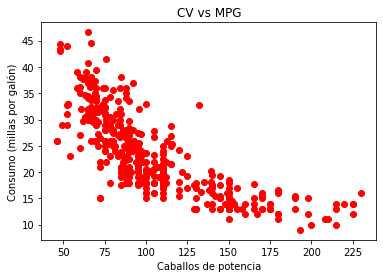

In [40]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [41]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [42]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
type(X)

pandas.core.series.Series

In [44]:
type(X_data)

numpy.ndarray

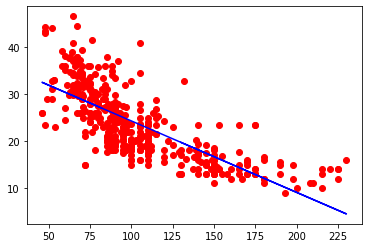

In [45]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [46]:
lm.score(X_data, Y) ##R² 

0.5746533406450252

In [47]:
SSD = np.sum((Y - lm.predict(X_data))**2)##Suma de los cuadrados de las diferencias
RSE = np.sqrt(SSD/(len(X_data)-1))
Y_mean = np.mean(Y)
error = RSE/Y_mean
SSD, RSE, Y_mean, error  
## Sumas cuadados de  las diferencias, Desviación estándar, Millas por galón(promedio), Margen de error

(10315.751960060918,
 5.046879480825511,
 23.514572864321607,
 0.21462773361633472)

## Modelo de regresión cuadrático
* mpg = a + b * horsepower²

In [48]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [49]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lm.score(X_data, Y)

0.4849887034823205

In [51]:
SSD = np.sum((Y - lm.predict(X_data))**2)##Suma de los cuadrados de las diferencias
RSE = np.sqrt(SSD/(len(X_data)-1))
Y_mean = np.mean(Y)
error = RSE/Y_mean
SSD, RSE, Y_mean, error*100
## Sumas cuadados de  las diferencias, Desviación estándar, Millas por galón(promedio), Margen de error
## El margen de error es más grande que en el modelo lineal

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

## Modelo de regresión lineal y cuadrático (Polinomio)
* mpg = a + b * horsepower + c * horsepower²

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  linear_model

In [53]:
poly = PolynomialFeatures(degree=2)##Polinomio de grado 2

In [54]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [55]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.score(X_data,Y)
## El valor de R² aumenta, por tanto es mejor que los otros modelos

0.6439066584257469

In [57]:
lm.intercept_

55.026192447081144

In [58]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.434 * hp + 0.00112615²

### Bucle que permita incrementar el grado del polinomio

In [63]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado " + str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
Suma de los cuadrados de las diferencias (SSD): 
8636.180643524502,
Desviación estandar (RSE): 
4.61778115803654,
Y_mean: 
23.514572864321607,
Error: 
19.6379546619069%
Regresión de grado 3
0.6444678885560744
58.44877411148572
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
Suma de los cuadrados de las diferencias (SSD): 
8622.56936742855,
Desviación estandar (RSE): 
4.614140736300908,
Y_mean: 
23.514572864321607,
Error: 
19.622473106036686%
Regresión de grado 4
0.6467674189704502
40.096643848808654
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
Suma de los cuadrados de las diferencias (SSD): 
8566.799832491351,
Desviación estandar (RSE): 
4.599194731579757,
Y_mean: 
23.514572864321607,
Error: 
19.558912501268786%
Regresión de grado 5
0.6547512491371934
-40.69402885502241
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 

In [62]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)##Suma de los cuadrados de las diferencias
    RSE = np.sqrt(SSD/(len(X_data)-1))
    Y_mean = np.mean(Y)
    error = RSE/Y_mean
    print("Suma de los cuadrados de las diferencias (SSD): \n"  +str(SSD) + ",\nDesviación estandar (RSE): \n" + str(RSE) + ",\nY_mean: \n" + str(Y_mean) + ",\nError: \n" + str(error*100)+"%")

In [64]:
print(regresion_validation)

<function regresion_validation at 0x7fa47ce41d90>


## El problema de los outliers
son los puntos dispersos y aislados de la gráfica

Text(0, 0.5, 'Millas por galón')

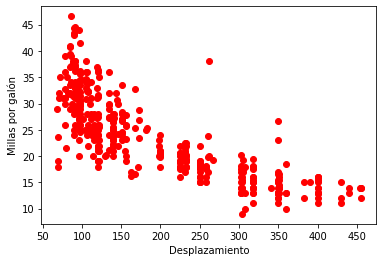

In [68]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")
plt.xlabel("Desplazamiento")
plt.ylabel("Millas por galón")

In [74]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
lm.score(X,Y)

0.6261049762826918

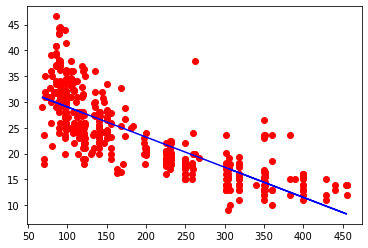

In [76]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [80]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [82]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [83]:
data_auto_clean = data_auto.drop([395, 258, 305, 372]) 
##Limpiando datos que están muy aislados para mejorar R²

In [85]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

In [87]:
lm.score(X,Y)

0.6462445894640768

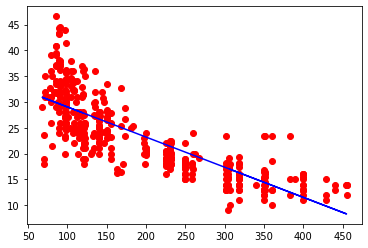

In [88]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")